<a href="https://colab.research.google.com/github/ianomunga/ExploringNumpy/blob/main/MNIST_Neural_Network_in_NumPy_From_Scratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#load all the dependent libraries, NumPy, Pandas & MatplotLib
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [ ]:
#load MNIST training dataset
data = pd.read_csv('/content/data/train.csv')
#to confirm that the dataset was loaded correctly
data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,...,pixel744,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
#to convert the Pandas DataFrame into a NumPy Array that can be wrangled mathematically
data = np.array(data)
m, n = data.shape

In [ ]:
#randomize the order of data by shuffling before splitting it into dev and training sets
np.random.shuffle(data)

data_dev = data[0:1000].T
Y_dev = data_dev[0]
X_dev = data_dev[1:n]
X_dev = X_dev / 255

data_train = data[1000:m].T
Y_train = data_train[0]
X_train = data_train[1:n]
X_train = X_train / 255
_, m_train = X_train.shape


#to check out the first column
X_train[:, 0].shape

(784,)

In [ ]:
Y_train

array([5, 1, 0, ..., 3, 2, 2])

Initialize the model's parametres and define the Rectified Linearn Unit [ReLu] activation function, the softmax activation function, one-hot encoding, forward & backward propagation and the parametre updating function 

In [ ]:
def init_params():
    W1 = np.random.rand(10, 784) - 0.5
    b1 = np.random.rand(10, 1) - 0.5
    W2 = np.random.rand(10, 10) - 0.5
    b2 = np.random.rand(10, 1) - 0.5
    return W1, b1, W2, b2

def ReLU(Z):
    return np.maximum(Z, 0)

def softmax(Z):
    A = np.exp(Z) / sum(np.exp(Z))
    return A
    
def forward_prop(W1, b1, W2, b2, X):
    Z1 = W1.dot(X) + b1
    A1 = ReLU(Z1)
    Z2 = W2.dot(A1) + b2
    A2 = softmax(Z2)
    return Z1, A1, Z2, A2

def ReLU_deriv(Z):
    return Z > 0

def one_hot(Y):
    one_hot_Y = np.zeros((Y.size, Y.max() + 1))
    one_hot_Y[np.arange(Y.size), Y] = 1
    one_hot_Y = one_hot_Y.T
    return one_hot_Y

def backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y):
    one_hot_Y = one_hot(Y)
    dZ2 = A2 - one_hot_Y
    dW2 = 1 / m * dZ2.dot(A1.T)
    db2 = 1 / m * np.sum(dZ2)
    dZ1 = W2.T.dot(dZ2) * ReLU_deriv(Z1)
    dW1 = 1 / m * dZ1.dot(X.T)
    db1 = 1 / m * np.sum(dZ1)
    return dW1, db1, dW2, db2

def update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha):
    W1 = W1 - alpha * dW1
    b1 = b1 - alpha * db1    
    W2 = W2 - alpha * dW2  
    b2 = b2 - alpha * db2    
    return W1, b1, W2, b2

In [ ]:
def get_predictions(A2):
    return np.argmax(A2, 0)

def get_accuracy(predictions, Y):
    print(predictions, Y)
    return np.sum(predictions == Y) / Y.size

def gradient_descent(X, Y, alpha, iterations):
    W1, b1, W2, b2 = init_params()
    for i in range(iterations):
        Z1, A1, Z2, A2 = forward_prop(W1, b1, W2, b2, X)
        dW1, db1, dW2, db2 = backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y)
        W1, b1, W2, b2 = update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha)
        if i % 10 == 0:
            print("Iteration: ", i)
            predictions = get_predictions(A2)
            print(get_accuracy(predictions, Y))
    return W1, b1, W2, b2

In [ ]:
#Run the model to learn the weights 
W1, b1, W2, b2 = gradient_descent(X_train, Y_train, 0.10, 500)

Iteration:  0
[4 0 9 ... 4 2 2] [5 1 0 ... 3 2 2]
0.11714634146341464
Iteration:  10
[4 0 7 ... 0 2 2] [5 1 0 ... 3 2 2]
0.1556829268292683
Iteration:  20
[0 0 7 ... 0 2 2] [5 1 0 ... 3 2 2]
0.2435121951219512
Iteration:  30
[0 0 0 ... 0 2 2] [5 1 0 ... 3 2 2]
0.3182439024390244
Iteration:  40
[0 1 0 ... 0 2 2] [5 1 0 ... 3 2 2]
0.36085365853658535
Iteration:  50
[0 1 0 ... 0 2 2] [5 1 0 ... 3 2 2]
0.38946341463414635
Iteration:  60
[8 1 0 ... 0 2 2] [5 1 0 ... 3 2 2]
0.4241951219512195
Iteration:  70
[8 1 0 ... 0 2 2] [5 1 0 ... 3 2 2]
0.46063414634146344
Iteration:  80
[8 1 0 ... 3 2 2] [5 1 0 ... 3 2 2]
0.5004146341463415
Iteration:  90
[8 1 0 ... 3 2 2] [5 1 0 ... 3 2 2]
0.5448536585365854
Iteration:  100
[8 1 0 ... 3 2 2] [5 1 0 ... 3 2 2]
0.5869024390243902
Iteration:  110
[8 1 0 ... 3 2 2] [5 1 0 ... 3 2 2]
0.6192926829268293
Iteration:  120
[3 1 0 ... 3 2 2] [5 1 0 ... 3 2 2]
0.6433658536585366
Iteration:  130
[3 1 0 ... 3 2 2] [5 1 0 ... 3 2 2]
0.6615609756097561
Iteration:  1

In [ ]:
def make_predictions(X, W1, b1, W2, b2):
    _, _, _, A2 = forward_prop(W1, b1, W2, b2, X)
    predictions = get_predictions(A2)
    return predictions

def test_prediction(index, W1, b1, W2, b2):
    current_image = X_train[:, index, None]
    prediction = make_predictions(X_train[:, index, None], W1, b1, W2, b2)
    label = Y_train[index]
    print("Prediction: ", prediction)
    print("Label: ", label)
    
    current_image = current_image.reshape((28, 28)) * 255
    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.show()

Prediction:  [8]
Label:  5


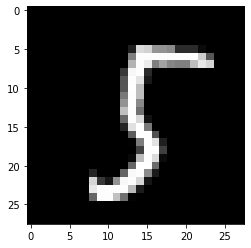

Prediction:  [1]
Label:  1


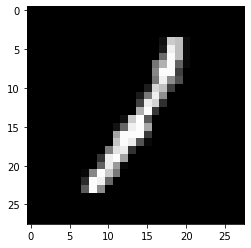

Prediction:  [0]
Label:  0


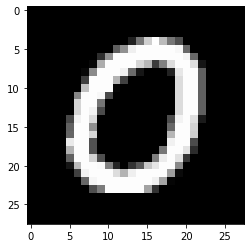

Prediction:  [6]
Label:  5


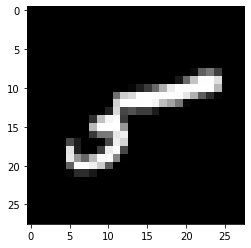

In [ ]:
#Test out the model's performance on test data
test_prediction(0, W1, b1, W2, b2)
test_prediction(1, W1, b1, W2, b2)
test_prediction(2, W1, b1, W2, b2)
test_prediction(3, W1, b1, W2, b2)

In [ ]:
#Test the model on validation data
dev_predictions = make_predictions(X_dev, W1, b1, W2, b2)
get_Accuracy(dev_predictions, Y_dev)

[2 9 9 3 3 2 0 4 0 0 3 8 9 5 5 5 5 0 7 0 1 6 4 0 7 3 6 2 4 9 2 3 4 5 4 7 3
 8 7 4 2 8 2 7 1 2 6 9 8 7 1 3 2 3 8 4 8 6 8 4 8 7 2 9 2 7 8 9 8 3 2 8 0 6
 2 8 9 1 6 9 2 0 9 1 8 7 1 2 0 3 2 6 9 8 6 7 1 2 7 0 6 9 7 2 0 5 3 7 8 9 0
 0 8 3 9 5 0 6 9 9 8 9 4 7 3 5 0 3 6 6 2 9 2 5 9 6 5 6 4 8 4 5 8 8 0 3 9 4
 9 8 6 0 4 0 4 3 2 8 1 0 2 2 7 3 1 3 7 3 2 6 1 5 1 7 7 5 7 0 5 6 2 6 5 6 5
 6 3 8 8 0 0 9 8 8 3 2 6 3 1 8 6 2 7 9 0 9 1 2 4 1 1 4 5 1 4 4 5 5 4 0 2 6
 0 7 4 1 0 5 6 0 6 7 5 6 9 2 7 1 5 3 1 4 7 2 5 1 9 1 7 0 0 5 0 5 3 0 8 9 6
 3 1 1 3 1 9 6 7 8 1 1 1 5 2 5 6 6 8 3 6 2 0 5 1 9 1 3 9 5 2 3 1 7 8 3 6 3
 4 4 0 8 0 6 1 0 0 5 1 8 3 3 4 0 5 7 2 6 3 6 3 1 0 4 8 5 5 7 0 2 0 4 8 6 2
 1 6 8 3 6 7 4 3 1 1 8 2 7 7 0 6 9 5 0 0 4 5 5 3 8 8 9 2 7 8 0 9 8 1 0 1 2
 7 2 4 9 2 2 8 7 4 1 4 7 1 2 1 8 6 3 1 4 2 8 9 3 7 9 3 1 8 6 5 6 7 6 2 1 3
 6 4 3 0 3 3 5 0 2 6 8 7 5 0 1 0 1 0 9 7 5 7 7 6 5 6 5 4 0 9 2 5 1 2 1 6 0
 4 2 7 8 1 3 2 7 2 3 1 5 8 6 3 1 6 0 8 9 3 0 9 6 0 1 6 1 9 5 8 3 0 6 3 1 7
 4 1 4 3 0 7 4 1 3 4 2 5 

0.831

We see that the model is able to accurately perform digit recognition 83 percent of the time.

This is all done with a single simple layer in the neural network and it leaves much more room for investigation and improvement in areas such as generalizing to even more digit recognition datasets and performing well on other metrics like precision as well as recall. This is far from the state-of-the-art, since conventional Neural Networks typically achieve upto 99 percent accuracy on MNIST.

Even then, this shows the raw power that can be leveraged from NumPy alone. In future, adding more layers to the Neural Net could be considered, and testing it out explicitly against popular classification algorithms implemented in the estimators of libraries like Scikit-learn.